In [ ]:
!pip install -q ultralytics
!pip install -q supervision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.5/870.5 kB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 kB 12.0 MB/s eta 0:00:00


In [ ]:
!pip install -q umap-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.7 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import supervision as sv
import cv2
import os
import numpy as np  # Import numpy
from sklearn.cluster import KMeans

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import os
import pickle
import cv2
import numpy as np
from ultralytics import YOLO
import supervision as sv

# Initialize model and tracker
model = YOLO("/content/drive/MyDrive/Football_Analysis/models/best_version3plus/best_version3plus.pt")

In [ ]:
from tqdm import tqdm
import supervision as sv

# Video input and player class ID
SOURCE_VIDEO_PATH = "/content/drive/MyDrive/Football_Analysis/input_videos/v1.mp4"
PLAYER_ID = 2  # Class ID for players
STRIDE = 30    # Frame stride

# Initialize frame generator
frame_generator = sv.get_video_frames_generator(
    source_path=SOURCE_VIDEO_PATH, stride=STRIDE)

# List to collect player crops
crops = []

# Iterate over video frames and process each one
for frame in tqdm(frame_generator, desc='Collecting crops'):
    # Perform inference on the frame using `predict`
    results = model.predict(frame, conf=0.3)

    # Convert inference result to supervision detections
    detections = sv.Detections.from_ultralytics(results[0])  # Get first result

    # Apply Non-Maximum Suppression (NMS)
    detections = detections.with_nms(threshold=0.5, class_agnostic=True)

    # Filter for player class only
    detections = detections[detections.class_id == PLAYER_ID]

    # Crop player regions from the frame
    players_crops = [sv.crop_image(frame, xyxy) for xyxy in detections.xyxy]

    # Add cropped images to the list
    crops += players_crops



0: 576x1024 1 goalkeeper, 19 players, 3 referees, 83.5ms
Speed: 24.0ms preprocess, 83.5ms inference, 104.1ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 18 players, 3 referees, 80.9ms
Speed: 7.7ms preprocess, 80.9ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 20 players, 1 referee, 80.0ms
Speed: 7.2ms preprocess, 80.0ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 1 ball, 20 players, 2 referees, 79.9ms
Speed: 15.5ms preprocess, 79.9ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 21 players, 3 referees, 79.9ms
Speed: 9.1ms preprocess, 79.9ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 1 ball, 22 players, 2 referees, 80.1ms
Speed: 12.7ms preprocess, 80.1ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 1 ball, 21 players, 3 referees, 85.5ms
Speed: 6.0ms preprocess, 85.5ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 1 ball, 20 players, 3 referees, 81.7ms
Speed: 15.4ms preprocess, 81.7ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 20 players, 3 referees, 79.9ms
Speed: 9.4ms preprocess, 79.9ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 21 players, 3 referees, 80.0ms
Speed: 9.6ms preprocess, 80.0ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 19 players, 3 referees, 79.9ms
Speed: 25.2ms preprocess, 79.9ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 22 players, 3 referees, 93.7ms
Speed: 21.7ms preprocess, 93.7ms inference, 1.0ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 1 ball, 20 players, 3 referees, 82.1ms
Speed: 16.6ms preprocess, 82.1ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 20 players, 3 referees, 80.0ms
Speed: 9.8ms preprocess, 80.0ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 20 players, 3 referees, 79.9ms
Speed: 15.5ms preprocess, 79.9ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 20 players, 3 referees, 80.0ms
Speed: 8.2ms preprocess, 80.0ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 19 players, 3 referees, 89.2ms
Speed: 8.4ms preprocess, 89.2ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 19 players, 3 referees, 98.2ms
Speed: 9.7ms preprocess, 98.2ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 1 goalkeeper, 21 players, 3 referees, 88.1ms
Speed: 7.9ms preprocess, 88.1ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 1 goalkeeper, 20 players, 2 referees, 82.1ms
Speed: 7.1ms preprocess, 82.1ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 1 goalkeeper, 19 players, 3 referees, 80.1ms
Speed: 7.9ms preprocess, 80.1ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 1 goalkeeper, 20 players, 3 referees, 79.9ms
Speed: 7.2ms preprocess, 79.9ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 1 goalkeeper, 20 players, 3 referees, 79.9ms
Speed: 9.0ms preprocess, 79.9ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 1 goalkeeper, 20 players, 3 referees, 79.8ms
Speed: 7.0ms preprocess, 79.8ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 1 goalkeeper, 20 players, 3 referees, 82.6ms
Speed: 8.0ms preprocess, 82.6ms inference, 0.5ms postprocess per image at shape (1, 3, 576, 1024)


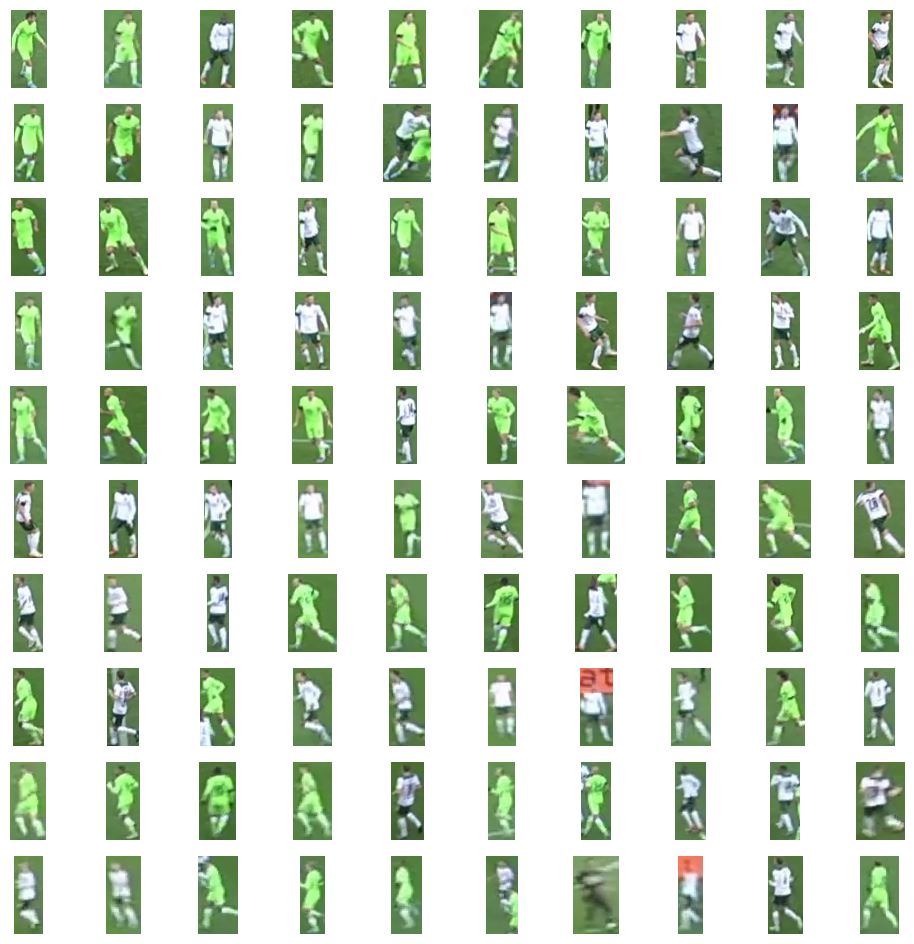

In [ ]:
sv.plot_images_grid(crops[:100], grid_size=(10, 10))

In [ ]:
import torch
from transformers import AutoProcessor, SiglipVisionModel

SIGLIP_MODEL_PATH = 'google/siglip-base-patch16-224'

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
EMBEDDINGS_MODEL = SiglipVisionModel.from_pretrained(SIGLIP_MODEL_PATH).to(DEVICE)
EMBEDDINGS_PROCESSOR = AutoProcessor.from_pretrained(SIGLIP_MODEL_PATH)

The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/813M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/368 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/711 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/409 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.40M [00:00<?, ?B/s]

In [ ]:
import numpy as np
from more_itertools import chunked

BATCH_SIZE = 32

crops = [sv.cv2_to_pillow(crop) for crop in crops]
batches = chunked(crops, BATCH_SIZE)
data = []
with torch.no_grad():
    for batch in tqdm(batches, desc='embedding extraction'):
        inputs = EMBEDDINGS_PROCESSOR(images=batch, return_tensors="pt").to(DEVICE)
        outputs = EMBEDDINGS_MODEL(**inputs)
        embeddings = torch.mean(outputs.last_hidden_state, dim=1).cpu().numpy()
        data.append(embeddings)

data = np.concatenate(data)

embedding extraction: 16it [00:07,  2.09it/s]


In [ ]:
# Correct import statement for UMAP
import umap.umap_ as umap
from sklearn.cluster import KMeans

# Initialize UMAP reducer and KMeans clustering model
REDUCER = umap.UMAP(n_components=3)
CLUSTERING_MODEL = KMeans(n_clusters=2)


In [ ]:
projections = REDUCER.fit_transform(data)
clusters = CLUSTERING_MODEL.fit_predict(projections)


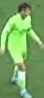
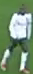
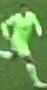
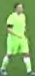
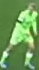
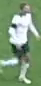
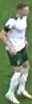
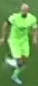
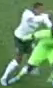
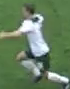
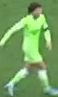
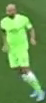
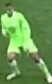
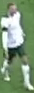
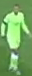
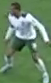
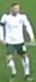
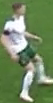
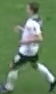
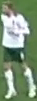
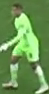
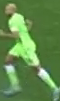
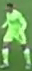
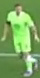
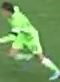
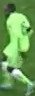
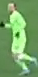
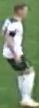
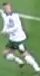
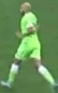
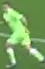
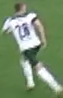
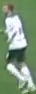
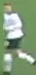
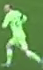
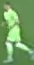
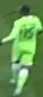
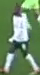
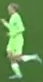
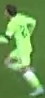
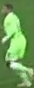
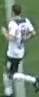
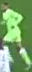
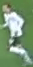
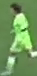
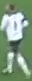
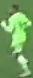
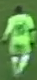
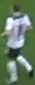
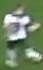
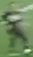
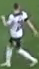
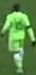
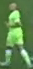
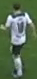
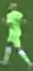
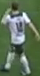
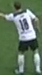
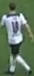
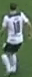
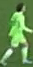
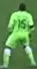
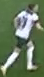
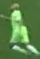
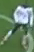
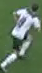
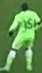
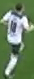
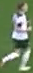
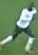
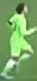
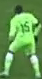
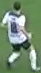
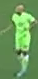
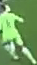
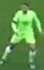
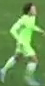
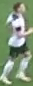
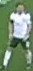
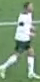
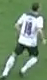
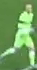
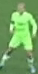
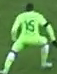
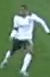
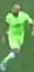
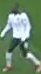
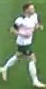
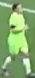
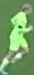
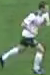
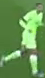
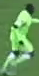
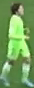
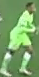
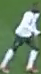
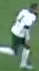
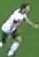
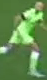
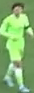
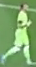
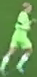
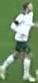
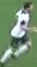
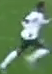
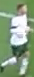
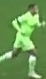
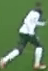
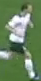
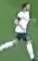
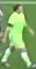
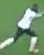
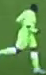
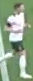
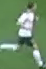
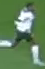
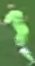
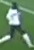
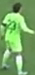
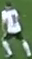
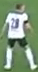
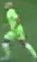
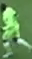
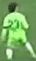
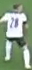
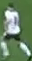
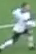
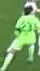
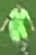
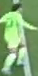
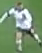
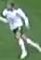
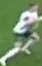
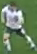
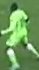
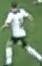
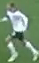
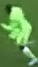
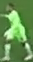

In [ ]:
import plotly.graph_objects as go
import numpy as np
from typing import Dict, List
from IPython.core.display import display, HTML
from PIL import Image
import base64
from io import BytesIO


def pil_image_to_data_uri(image: Image.Image) -> str:
    buffered = BytesIO()
    image.save(buffered, format="PNG")
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return f"data:image/png;base64,{img_str}"


def display_projections(
    labels: np.ndarray,
    projections: np.ndarray,
    images: List[Image.Image],
    show_legend: bool = False,
    show_markers_with_text: bool = True
) -> None:
    image_data_uris = {f"image_{i}": pil_image_to_data_uri(image) for i, image in enumerate(images)}
    image_ids = np.array([f"image_{i}" for i in range(len(images))])

    unique_labels = np.unique(labels)
    traces = []
    for unique_label in unique_labels:
        mask = labels == unique_label
        customdata_masked = image_ids[mask]
        trace = go.Scatter3d(
            x=projections[mask][:, 0],
            y=projections[mask][:, 1],
            z=projections[mask][:, 2],
            mode='markers+text' if show_markers_with_text else 'markers',
            text=labels[mask],
            customdata=customdata_masked,
            name=str(unique_label),
            marker=dict(size=8),
            hovertemplate="<b>class: %{text}</b><br>image ID: %{customdata}<extra></extra>"
        )
        traces.append(trace)

    fig = go.Figure(data=traces)
    fig.update_layout(
        scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
        width=1000,
        height=1000,
        showlegend=show_legend
    )

    plotly_div = fig.to_html(full_html=False, include_plotlyjs=False, div_id="scatter-plot-3d")

    javascript_code = f"""
    <script>
        function displayImage(imageId) {{
            var imageElement = document.getElementById('image-display');
            var placeholderText = document.getElementById('placeholder-text');
            var imageDataURIs = {image_data_uris};
            imageElement.src = imageDataURIs[imageId];
            imageElement.style.display = 'block';
            placeholderText.style.display = 'none';
        }}

        var chartElement = document.getElementById('scatter-plot-3d');

        chartElement.on('plotly_click', function(data) {{
            var customdata = data.points[0].customdata;
            displayImage(customdata);
        }});
    </script>
    """

    html_template = f"""
    <!DOCTYPE html>
    <html>
        <head>
            <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
            <style>
                #image-container {{
                    position: fixed;
                    top: 0;
                    left: 0;
                    width: 200px;
                    height: 200px;
                    padding: 5px;
                    border: 1px solid #ccc;
                    background-color: white;
                    z-index: 1000;
                    box-sizing: border-box;
                    display: flex;
                    align-items: center;
                    justify-content: center;
                    text-align: center;
                }}
                #image-display {{
                    width: 100%;
                    height: 100%;
                    object-fit: contain;
                }}
            </style>
        </head>
        <body>
            {plotly_div}
            <div id="image-container">
                <img id="image-display" src="" alt="Selected image" style="display: none;" />
                <p id="placeholder-text">Click on a data entry to display an image</p>
            </div>
            {javascript_code}
        </body>
    </html>
    """

    display(HTML(html_template))

display_projections(clusters, projections, crops)

# keep only the upper 40% of each cropped image.

In [ ]:
from tqdm import tqdm
import supervision as sv

# Video input and player class ID
SOURCE_VIDEO_PATH = "/content/drive/MyDrive/Football_Analysis/input_videos/v1.mp4"
PLAYER_ID = 2  # Class ID for players
STRIDE = 30    # Frame stride

# Initialize frame generator
frame_generator = sv.get_video_frames_generator(
    source_path=SOURCE_VIDEO_PATH, stride=STRIDE)

# List to collect player crops
crops = []

# Iterate over video frames and process each one
for frame in tqdm(frame_generator, desc='Collecting crops'):
    # Perform inference on the frame using `predict`
    results = model.predict(frame, conf=0.3)

    # Convert inference result to supervision detections
    detections = sv.Detections.from_ultralytics(results[0])  # Get first result

    # Apply Non-Maximum Suppression (NMS)
    detections = detections.with_nms(threshold=0.5, class_agnostic=True)

    # Filter for player class only
    detections = detections[detections.class_id == PLAYER_ID]

    # Crop player regions from the frame, keeping only the upper 40%
    for xyxy in detections.xyxy:
        # xyxy format: [x1, y1, x2, y2] (top-left and bottom-right corners)
        x1, y1, x2, y2 = xyxy

        # Adjust the height to only the top 40% of the bounding box
        new_height = int((y2 - y1) * 0.4)
        y2 = y1 + new_height  # Update y2 to get only the upper part

        # Crop the image using the modified bounding box
        cropped_image = sv.crop_image(frame, [x1, y1, x2, y2])

        # Add the cropped image to the list
        crops.append(cropped_image)

# Now `crops` contains all the upper 40% cropped player images



0: 576x1024 1 goalkeeper, 19 players, 3 referees, 109.6ms
Speed: 15.2ms preprocess, 109.6ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 18 players, 3 referees, 86.3ms
Speed: 10.6ms preprocess, 86.3ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 20 players, 1 referee, 92.0ms
Speed: 9.7ms preprocess, 92.0ms inference, 2.9ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 1 ball, 20 players, 2 referees, 81.1ms
Speed: 16.0ms preprocess, 81.1ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 21 players, 3 referees, 80.0ms
Speed: 7.9ms preprocess, 80.0ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 1 ball, 22 players, 2 referees, 89.1ms
Speed: 19.0ms preprocess, 89.1ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 1 ball, 21 players, 3 referees, 80.9ms
Speed: 8.2ms preprocess, 80.9ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 1 ball, 20 players, 3 referees, 101.3ms
Speed: 16.9ms preprocess, 101.3ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 20 players, 3 referees, 84.5ms
Speed: 6.5ms preprocess, 84.5ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 21 players, 3 referees, 81.0ms
Speed: 6.9ms preprocess, 81.0ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 19 players, 3 referees, 80.1ms
Speed: 13.2ms preprocess, 80.1ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 22 players, 3 referees, 80.1ms
Speed: 13.8ms preprocess, 80.1ms inference, 1.0ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 1 ball, 20 players, 3 referees, 80.1ms
Speed: 8.3ms preprocess, 80.1ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 20 players, 3 referees, 95.7ms
Speed: 13.6ms preprocess, 95.7ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 20 players, 3 referees, 109.5ms
Speed: 11.4ms preprocess, 109.5ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 20 players, 3 referees, 105.2ms
Speed: 10.6ms preprocess, 105.2ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 19 players, 3 referees, 85.5ms
Speed: 7.7ms preprocess, 85.5ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 19 players, 3 referees, 109.5ms
Speed: 28.3ms preprocess, 109.5ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 1 goalkeeper, 21 players, 3 referees, 87.3ms
Speed: 13.3ms preprocess, 87.3ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 1 goalkeeper, 20 players, 2 referees, 87.2ms
Speed: 17.7ms preprocess, 87.2ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 1 goalkeeper, 19 players, 3 referees, 89.3ms
Speed: 11.9ms preprocess, 89.3ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 1 goalkeeper, 20 players, 3 referees, 80.4ms
Speed: 16.9ms preprocess, 80.4ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 1 goalkeeper, 20 players, 3 referees, 109.5ms
Speed: 42.5ms preprocess, 109.5ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 1 goalkeeper, 20 players, 3 referees, 99.1ms
Speed: 14.0ms preprocess, 99.1ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 1 goalkeeper, 20 players, 3 referees, 84.1ms
Speed: 18.3ms preprocess, 84.1ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)


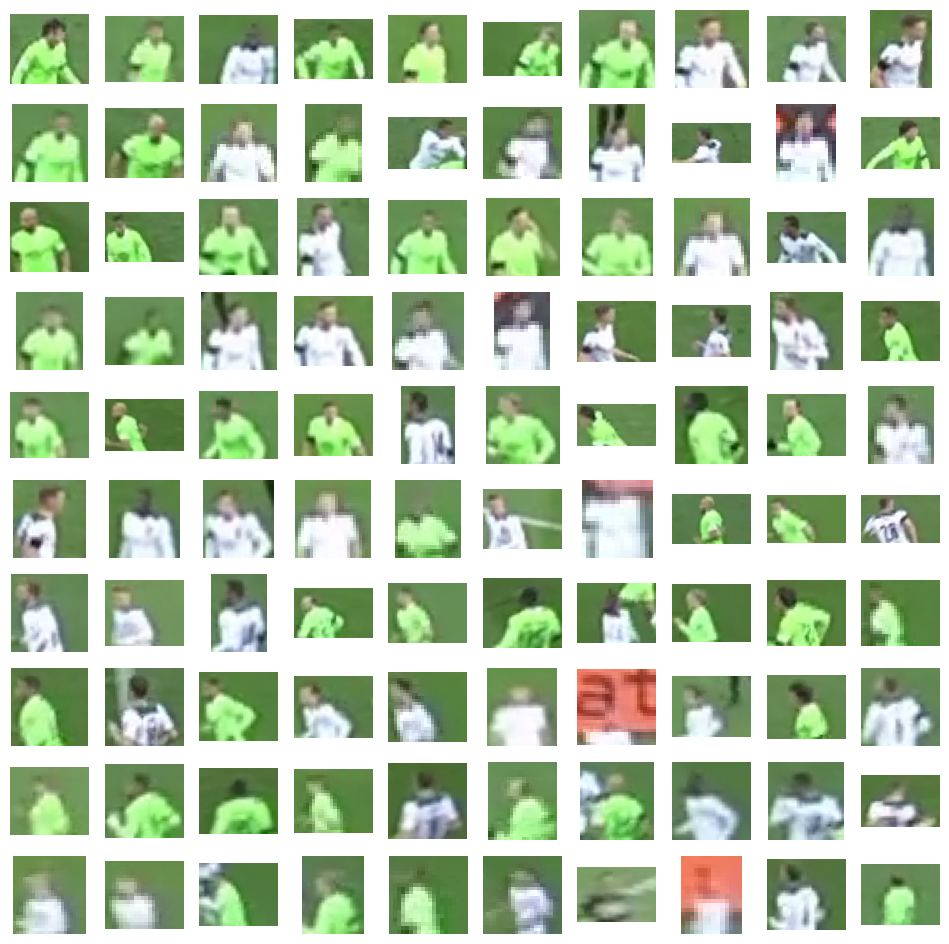

In [ ]:
sv.plot_images_grid(crops[:100], grid_size=(10, 10))

In [ ]:
import torch
from transformers import AutoProcessor, SiglipVisionModel

SIGLIP_MODEL_PATH = 'google/siglip-base-patch16-224'

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
EMBEDDINGS_MODEL = SiglipVisionModel.from_pretrained(SIGLIP_MODEL_PATH).to(DEVICE)
EMBEDDINGS_PROCESSOR = AutoProcessor.from_pretrained(SIGLIP_MODEL_PATH)

In [ ]:
import numpy as np
from more_itertools import chunked

BATCH_SIZE = 32

crops = [sv.cv2_to_pillow(crop) for crop in crops]
batches = chunked(crops, BATCH_SIZE)
data = []
with torch.no_grad():
    for batch in tqdm(batches, desc='embedding extraction'):
        inputs = EMBEDDINGS_PROCESSOR(images=batch, return_tensors="pt").to(DEVICE)
        outputs = EMBEDDINGS_MODEL(**inputs)
        embeddings = torch.mean(outputs.last_hidden_state, dim=1).cpu().numpy()
        data.append(embeddings)

data = np.concatenate(data)

embedding extraction: 16it [00:07,  2.10it/s]


In [ ]:
# Correct import statement for UMAP
import umap.umap_ as umap
from sklearn.cluster import KMeans

# Initialize UMAP reducer and KMeans clustering model
REDUCER = umap.UMAP(n_components=3)
CLUSTERING_MODEL = KMeans(n_clusters=2)


In [ ]:
projections = REDUCER.fit_transform(data)
clusters = CLUSTERING_MODEL.fit_predict(projections)


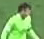
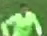
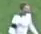
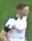
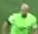
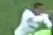
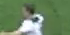
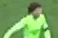
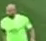
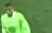
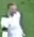
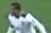
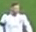
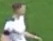
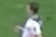
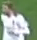
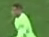
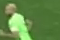
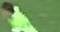
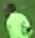
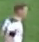
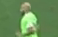
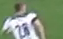
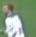
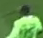
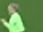
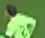
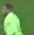
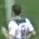
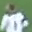
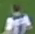
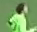
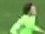
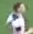
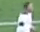
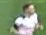
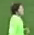
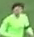
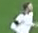
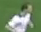
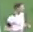

In [ ]:
import plotly.graph_objects as go
import numpy as np
from typing import Dict, List
from IPython.core.display import display, HTML
from PIL import Image
import base64
from io import BytesIO


def pil_image_to_data_uri(image: Image.Image) -> str:
    buffered = BytesIO()
    image.save(buffered, format="PNG")
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return f"data:image/png;base64,{img_str}"


def display_projections(
    labels: np.ndarray,
    projections: np.ndarray,
    images: List[Image.Image],
    show_legend: bool = False,
    show_markers_with_text: bool = True
) -> None:
    image_data_uris = {f"image_{i}": pil_image_to_data_uri(image) for i, image in enumerate(images)}
    image_ids = np.array([f"image_{i}" for i in range(len(images))])

    unique_labels = np.unique(labels)
    traces = []
    for unique_label in unique_labels:
        mask = labels == unique_label
        customdata_masked = image_ids[mask]
        trace = go.Scatter3d(
            x=projections[mask][:, 0],
            y=projections[mask][:, 1],
            z=projections[mask][:, 2],
            mode='markers+text' if show_markers_with_text else 'markers',
            text=labels[mask],
            customdata=customdata_masked,
            name=str(unique_label),
            marker=dict(size=8),
            hovertemplate="<b>class: %{text}</b><br>image ID: %{customdata}<extra></extra>"
        )
        traces.append(trace)

    fig = go.Figure(data=traces)
    fig.update_layout(
        scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
        width=1000,
        height=1000,
        showlegend=show_legend
    )

    plotly_div = fig.to_html(full_html=False, include_plotlyjs=False, div_id="scatter-plot-3d")

    javascript_code = f"""
    <script>
        function displayImage(imageId) {{
            var imageElement = document.getElementById('image-display');
            var placeholderText = document.getElementById('placeholder-text');
            var imageDataURIs = {image_data_uris};
            imageElement.src = imageDataURIs[imageId];
            imageElement.style.display = 'block';
            placeholderText.style.display = 'none';
        }}

        var chartElement = document.getElementById('scatter-plot-3d');

        chartElement.on('plotly_click', function(data) {{
            var customdata = data.points[0].customdata;
            displayImage(customdata);
        }});
    </script>
    """

    html_template = f"""
    <!DOCTYPE html>
    <html>
        <head>
            <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
            <style>
                #image-container {{
                    position: fixed;
                    top: 0;
                    left: 0;
                    width: 200px;
                    height: 200px;
                    padding: 5px;
                    border: 1px solid #ccc;
                    background-color: white;
                    z-index: 1000;
                    box-sizing: border-box;
                    display: flex;
                    align-items: center;
                    justify-content: center;
                    text-align: center;
                }}
                #image-display {{
                    width: 100%;
                    height: 100%;
                    object-fit: contain;
                }}
            </style>
        </head>
        <body>
            {plotly_div}
            <div id="image-container">
                <img id="image-display" src="" alt="Selected image" style="display: none;" />
                <p id="placeholder-text">Click on a data entry to display an image</p>
            </div>
            {javascript_code}
        </body>
    </html>
    """

    display(HTML(html_template))

display_projections(clusters, projections, crops)

In [ ]:
from tqdm import tqdm
import supervision as sv

# Video input and player class ID
SOURCE_VIDEO_PATH = "/content/drive/MyDrive/Football_Analysis/input_videos/v1.mp4"
PLAYER_ID = 2  # Class ID for players
STRIDE = 30    # Frame stride

# Initialize frame generator
frame_generator = sv.get_video_frames_generator(
    source_path=SOURCE_VIDEO_PATH, stride=STRIDE)

# List to collect player crops
crops = []

# Iterate over video frames and process each one
for frame in tqdm(frame_generator, desc='Collecting crops'):
    # Perform inference on the frame using `predict`
    results = model.predict(frame, conf=0.3)

    # Convert inference result to supervision detections
    detections = sv.Detections.from_ultralytics(results[0])  # Get first result

    # Apply Non-Maximum Suppression (NMS)
    detections = detections.with_nms(threshold=0.5, class_agnostic=True)

    # Filter for player class only
    detections = detections[detections.class_id == PLAYER_ID]

    # Crop player regions from the frame, keeping only the upper 40%
    for xyxy in detections.xyxy:
        # xyxy format: [x1, y1, x2, y2] (top-left and bottom-right corners)
        x1, y1, x2, y2 = xyxy

        # Adjust the height to only the top 40% of the bounding box
        new_height = int((y2 - y1) * 0.4)
        y2 = y1 + new_height  # Update y2 to get only the upper part

        # Adjust the width by removing 20% from both the left and right
        width = x2 - x1
        x1 += int(width * 0.2)  # Move x1 right by 20% of the width
        x2 -= int(width * 0.2)  # Move x2 left by 20% of the width

        # Crop the image using the modified bounding box
        cropped_image = sv.crop_image(frame, [x1, y1, x2, y2])

        # Add the cropped image to the list
        crops.append(cropped_image)

# Now `crops` contains all the cropped player images (upper 40% and 20% narrower on both sides)



0: 576x1024 1 goalkeeper, 19 players, 3 referees, 116.5ms
Speed: 7.8ms preprocess, 116.5ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 18 players, 3 referees, 111.4ms
Speed: 14.0ms preprocess, 111.4ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 20 players, 1 referee, 112.0ms
Speed: 7.1ms preprocess, 112.0ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 1 ball, 20 players, 2 referees, 110.7ms
Speed: 16.1ms preprocess, 110.7ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 21 players, 3 referees, 111.8ms
Speed: 16.3ms preprocess, 111.8ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 1 ball, 22 players, 2 referees, 84.3ms
Speed: 12.6ms preprocess, 84.3ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 1 ball, 21 players, 3 referees, 81.2ms
Speed: 14.0ms preprocess, 81.2ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 1 ball, 20 players, 3 referees, 84.7ms
Speed: 9.6ms preprocess, 84.7ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 20 players, 3 referees, 80.2ms
Speed: 7.5ms preprocess, 80.2ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 21 players, 3 referees, 107.8ms
Speed: 13.4ms preprocess, 107.8ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 19 players, 3 referees, 109.7ms
Speed: 19.6ms preprocess, 109.7ms inference, 1.0ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 22 players, 3 referees, 112.2ms
Speed: 7.9ms preprocess, 112.2ms inference, 1.0ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 1 ball, 20 players, 3 referees, 109.7ms
Speed: 17.9ms preprocess, 109.7ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 20 players, 3 referees, 84.5ms
Speed: 31.0ms preprocess, 84.5ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 20 players, 3 referees, 81.2ms
Speed: 14.4ms preprocess, 81.2ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 20 players, 3 referees, 80.1ms
Speed: 7.7ms preprocess, 80.1ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 19 players, 3 referees, 80.0ms
Speed: 8.3ms preprocess, 80.0ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 19 players, 3 referees, 101.1ms
Speed: 12.0ms preprocess, 101.1ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 1 goalkeeper, 21 players, 3 referees, 86.0ms
Speed: 24.3ms preprocess, 86.0ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 1 goalkeeper, 20 players, 2 referees, 82.9ms
Speed: 7.6ms preprocess, 82.9ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 1 goalkeeper, 19 players, 3 referees, 86.7ms
Speed: 9.4ms preprocess, 86.7ms inference, 7.1ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 1 goalkeeper, 20 players, 3 referees, 96.2ms
Speed: 13.5ms preprocess, 96.2ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 1 goalkeeper, 20 players, 3 referees, 109.5ms
Speed: 35.3ms preprocess, 109.5ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 1 goalkeeper, 20 players, 3 referees, 109.7ms
Speed: 18.2ms preprocess, 109.7ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)



0: 576x1024 1 goalkeeper, 20 players, 3 referees, 90.6ms
Speed: 13.2ms preprocess, 90.6ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 1024)


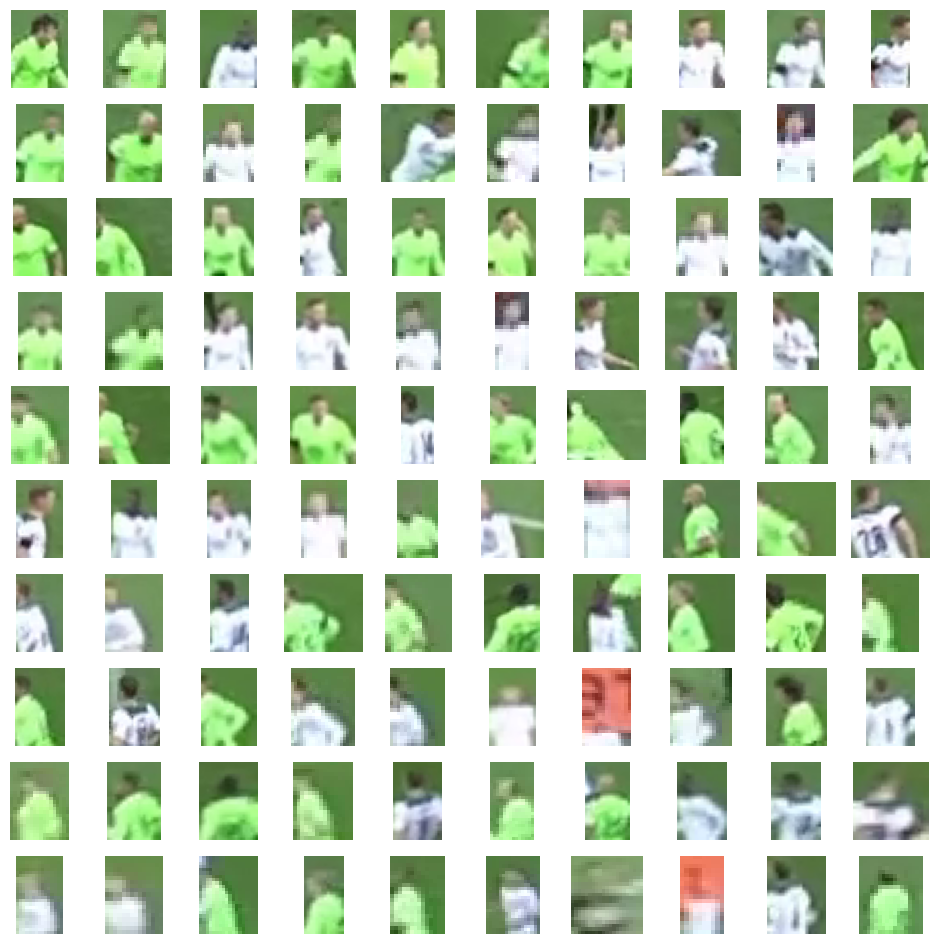

In [ ]:
sv.plot_images_grid(crops[:100], grid_size=(10, 10))

In [ ]:
import torch
from transformers import AutoProcessor, SiglipVisionModel

SIGLIP_MODEL_PATH = 'google/siglip-base-patch16-224'

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
EMBEDDINGS_MODEL = SiglipVisionModel.from_pretrained(SIGLIP_MODEL_PATH).to(DEVICE)
EMBEDDINGS_PROCESSOR = AutoProcessor.from_pretrained(SIGLIP_MODEL_PATH)

In [ ]:
import numpy as np
from more_itertools import chunked

BATCH_SIZE = 32

crops = [sv.cv2_to_pillow(crop) for crop in crops]
batches = chunked(crops, BATCH_SIZE)
data = []
with torch.no_grad():
    for batch in tqdm(batches, desc='embedding extraction'):
        inputs = EMBEDDINGS_PROCESSOR(images=batch, return_tensors="pt").to(DEVICE)
        outputs = EMBEDDINGS_MODEL(**inputs)
        embeddings = torch.mean(outputs.last_hidden_state, dim=1).cpu().numpy()
        data.append(embeddings)

data = np.concatenate(data)

embedding extraction: 16it [00:07,  2.03it/s]


In [ ]:
# Correct import statement for UMAP
import umap.umap_ as umap
from sklearn.cluster import KMeans

# Initialize UMAP reducer and KMeans clustering model
REDUCER = umap.UMAP(n_components=3)
CLUSTERING_MODEL = KMeans(n_clusters=2)


In [ ]:
projections = REDUCER.fit_transform(data)
clusters = CLUSTERING_MODEL.fit_predict(projections)


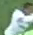
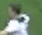
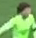
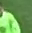
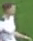
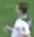
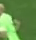
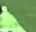
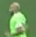
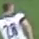

In [ ]:
import plotly.graph_objects as go
import numpy as np
from typing import Dict, List
from IPython.core.display import display, HTML
from PIL import Image
import base64
from io import BytesIO


def pil_image_to_data_uri(image: Image.Image) -> str:
    buffered = BytesIO()
    image.save(buffered, format="PNG")
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return f"data:image/png;base64,{img_str}"


def display_projections(
    labels: np.ndarray,
    projections: np.ndarray,
    images: List[Image.Image],
    show_legend: bool = False,
    show_markers_with_text: bool = True
) -> None:
    image_data_uris = {f"image_{i}": pil_image_to_data_uri(image) for i, image in enumerate(images)}
    image_ids = np.array([f"image_{i}" for i in range(len(images))])

    unique_labels = np.unique(labels)
    traces = []
    for unique_label in unique_labels:
        mask = labels == unique_label
        customdata_masked = image_ids[mask]
        trace = go.Scatter3d(
            x=projections[mask][:, 0],
            y=projections[mask][:, 1],
            z=projections[mask][:, 2],
            mode='markers+text' if show_markers_with_text else 'markers',
            text=labels[mask],
            customdata=customdata_masked,
            name=str(unique_label),
            marker=dict(size=8),
            hovertemplate="<b>class: %{text}</b><br>image ID: %{customdata}<extra></extra>"
        )
        traces.append(trace)

    fig = go.Figure(data=traces)
    fig.update_layout(
        scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
        width=1000,
        height=1000,
        showlegend=show_legend
    )

    plotly_div = fig.to_html(full_html=False, include_plotlyjs=False, div_id="scatter-plot-3d")

    javascript_code = f"""
    <script>
        function displayImage(imageId) {{
            var imageElement = document.getElementById('image-display');
            var placeholderText = document.getElementById('placeholder-text');
            var imageDataURIs = {image_data_uris};
            imageElement.src = imageDataURIs[imageId];
            imageElement.style.display = 'block';
            placeholderText.style.display = 'none';
        }}

        var chartElement = document.getElementById('scatter-plot-3d');

        chartElement.on('plotly_click', function(data) {{
            var customdata = data.points[0].customdata;
            displayImage(customdata);
        }});
    </script>
    """

    html_template = f"""
    <!DOCTYPE html>
    <html>
        <head>
            <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
            <style>
                #image-container {{
                    position: fixed;
                    top: 0;
                    left: 0;
                    width: 200px;
                    height: 200px;
                    padding: 5px;
                    border: 1px solid #ccc;
                    background-color: white;
                    z-index: 1000;
                    box-sizing: border-box;
                    display: flex;
                    align-items: center;
                    justify-content: center;
                    text-align: center;
                }}
                #image-display {{
                    width: 100%;
                    height: 100%;
                    object-fit: contain;
                }}
            </style>
        </head>
        <body>
            {plotly_div}
            <div id="image-container">
                <img id="image-display" src="" alt="Selected image" style="display: none;" />
                <p id="placeholder-text">Click on a data entry to display an image</p>
            </div>
            {javascript_code}
        </body>
    </html>
    """

    display(HTML(html_template))

display_projections(clusters, projections, crops)